In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os

from google.colab import drive
drive.mount("/content/drive")

import sys
sys.path.insert(0,'/content/drive/MyDrive/ColabNotebooks')
from UZ_utils import *

sys.path.insert(0,'/content/drive/MyDrive/ColabNotebooks/assignment2')
from a2_utils import *

Mounted at /content/drive


In [3]:
def gray(J):
  I = np.copy(J)
  uint8 = (I.dtype == "uint8")

  if uint8:
    I = I.astype("float64")/255
  
  avg = (I[:,:,0]+I[:,:,1]+I[:,:,2])/3

  I[:,:,0] = avg #r
  I[:,:,1] = avg #g
  I[:,:,2] = avg #b

  I = I[:,:,0]

  if uint8:
    I = (I*255).astype("uint8")

  return(I)

def draw_hist(H, string = "bins"):
  plt.bar(range(len(H)), H)


  plt.xlabel(string)
  plt.ylabel('y - axis')

  plt.show()

def sp_noise_1D(I, percent=.1):
    res = I.copy()
    

    res[np.random.rand(I.shape[0]) < percent / 2] = 1
    res[np.random.rand(I.shape[0]) < percent / 2] = 0

    return res

EX 1a



In [ ]:
def myhist3(I_,n_bins):
  H = np.zeros((n_bins,n_bins,n_bins))
  # H(x,y,z)
  # I = I.reshape(-1)

  I = np.copy(I_)
  if I.dtype == "uint8":
    I = np.astype("float64") / 255

  for h in range(len(I)):
    for w in range(len(I[0])):
      koo = [None,None,None]
      for c in range(len(I[0,0])):
        koo[c] = int(I[h,w,c] * n_bins) if I[h,w,c] != 1 else n_bins - 1
      H[koo[0],koo[1],koo[2]]+=1
  #print(3 * np.sum(H) == len(I.reshape(-1)))
  return H/np.sum(H)

I = imread('/content/drive/MyDrive/ColabNotebooks/assignment1/images/bird.jpg')

n_bins = 3
H = myhist3(I, n_bins)
print(H)

[[[8.66612678e-01 2.09413110e-02 1.30525915e-03]
  [6.35162602e-06 1.35289634e-03 2.15320122e-03]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[1.93915142e-02 3.51562500e-03 8.25711382e-05]
  [1.84038364e-02 2.95572917e-02 7.62195122e-03]
  [0.00000000e+00 3.17581301e-06 3.17581301e-05]]

 [[3.17581301e-06 0.00000000e+00 0.00000000e+00]
  [1.79274644e-02 7.16463415e-03 1.46087398e-04]
  [6.35162602e-06 3.12182419e-03 6.51041667e-04]]]


EX 1b

In [ ]:
def compare_histograms(H1, H2, mode):
  if H1.shape != H2.shape:
    return None
  
  H1 = H1.reshape(-1)
  H2 = H2.reshape(-1)
  if mode == "L2":
    return np.sqrt(np.sum(np.square(H2 - H1)))
  elif mode == "X":
    e = 0.0000000001
    return (1/2) * np.sum(np.square(H2 - H1)/(H2 + H1 + e))
  elif mode == "intersection":
    return 1 - np.sum(np.minimum(H1,H2))
  elif mode == "hell":
    return np.sqrt(1/2 * np.sum(np.square(np.sqrt(H1)-np.sqrt(H2))))



n_bins = 3

I = imread('/content/drive/MyDrive/ColabNotebooks/assignment1/images/bird.jpg')
H1 = myhist3(I, n_bins)

I = imread('/content/drive/MyDrive/ColabNotebooks/assignment1/images/coins.jpg')
H2 = myhist3(I, n_bins)

print(compare_histograms(H1,H2,"hell"))

0.8979024933952149


EX 1c

<BarContainer object of 512 artists>

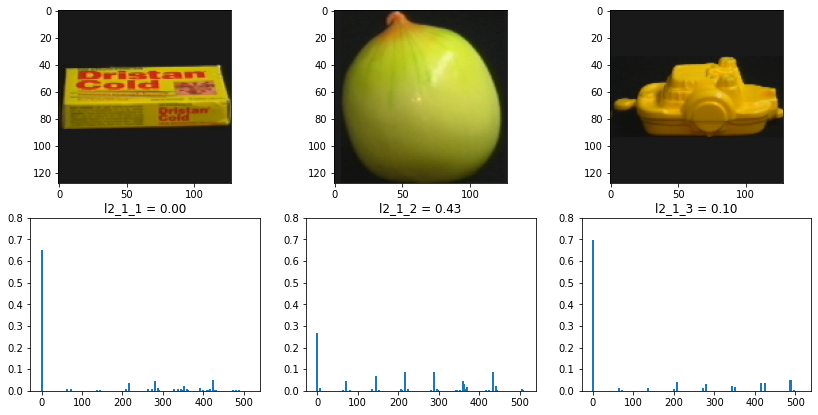

In [ ]:
n_bins = 8

I1 = imread('/content/drive/MyDrive/ColabNotebooks/assignment2/dataset/object_01_1.png')
H1 = myhist3(I1, n_bins)
H1 = H1.flatten()

I2 = imread('/content/drive/MyDrive/ColabNotebooks/assignment2/dataset/object_02_1.png')
H2 = myhist3(I2, n_bins)
H2 = H2.flatten()

I3 = imread('/content/drive/MyDrive/ColabNotebooks/assignment2/dataset/object_03_1.png')
H3 = myhist3(I3, n_bins)
H3 = H3.flatten()


fig, axs = plt.subplots(2, 3, figsize=(14,7))



axs[0, 0].imshow(I1)
axs[0, 1].imshow(I2)
axs[0, 2].imshow(I3)

y_max = 0.8

axs[1, 0].set_ylim(0,y_max)
l2 = compare_histograms(H1,H1,"L2")
axs[1, 0].title.set_text(f"l2_1_1 = {l2:.2f}")
axs[1, 0].bar(range(len(H1)), H1, width=5)

axs[1, 1].set_ylim(0,y_max)
l2 = compare_histograms(H1,H2,"L2")
axs[1, 1].title.set_text(f"l2_1_2 = {l2:.2f}")
axs[1, 1].bar(range(len(H2)), H2, width=5)

axs[1, 2].set_ylim(0,y_max)
l2 = compare_histograms(H1,H3,"L2")
axs[1, 2].title.set_text(f"l2_1_3 = {l2:.2f}")
axs[1, 2].bar(range(len(H3)), H3, width=5)















EX 1d

In [ ]:
I_ = imread('/content/drive/MyDrive/ColabNotebooks/assignment2/dataset/object_05_4.png')
H_ = myhist3(I_, n_bins).reshape(-1)



class Q:
  mode = None
  def __init__(self, name, image, n_bins):
      self.name = name
      self.image = image
      hist = myhist3(image, n_bins).reshape(-1)
      self.hist = hist
      self.dist = None
      if self.hist is None:
        print("HALLO")

  def __lt__(self, other):
    A = compare_histograms(self.hist, H_, Q.mode)
    B = compare_histograms(other.hist, H_, Q.mode)
    return A < B

def retrieve(folder, n_bins):
  qs = []
  for filename in os.listdir(folder):
      q = Q(name = filename,
            image = imread(os.path.join(folder,filename)),
            n_bins = n_bins)
      if q.image is not None and q.hist is not None:
          qs.append(q)
      else:
        print("HERE")
  return qs


n_bins = 8
qss = {}
retrieved = retrieve("/content/drive/MyDrive/ColabNotebooks/assignment2/dataset/", n_bins)


for mode in ["L2", "X", "intersection", "hell"]:
  qss[mode] = list(retrieved)
  Q.mode = mode
  qss[mode].sort()


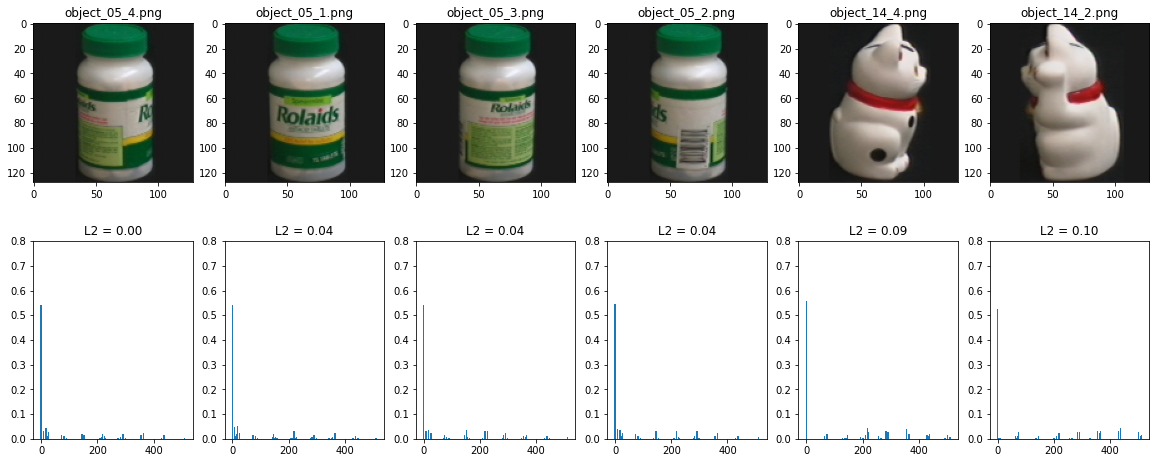

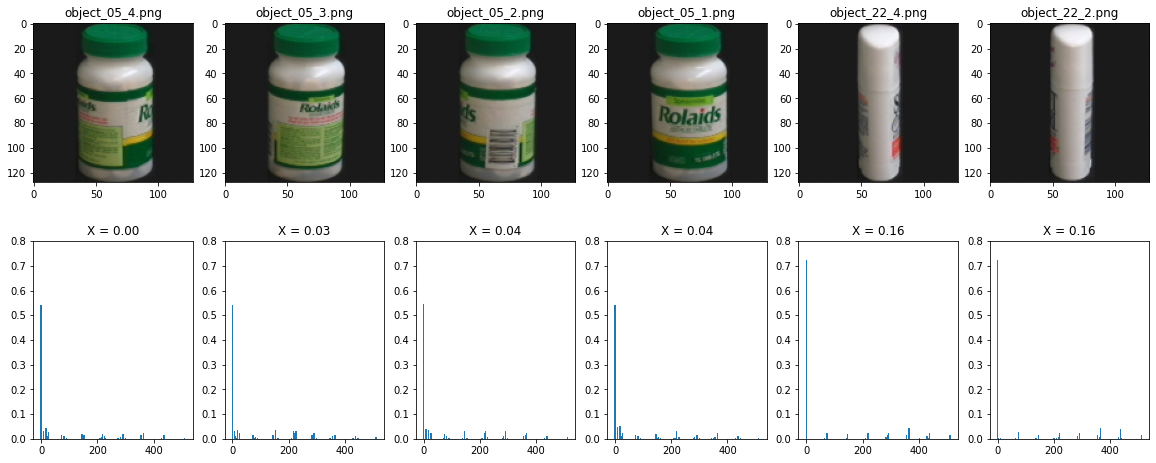

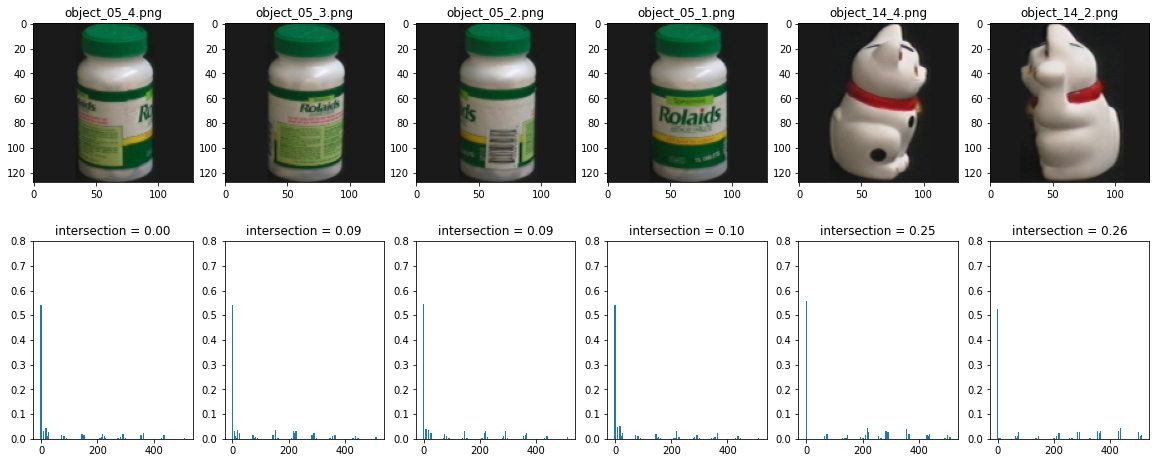

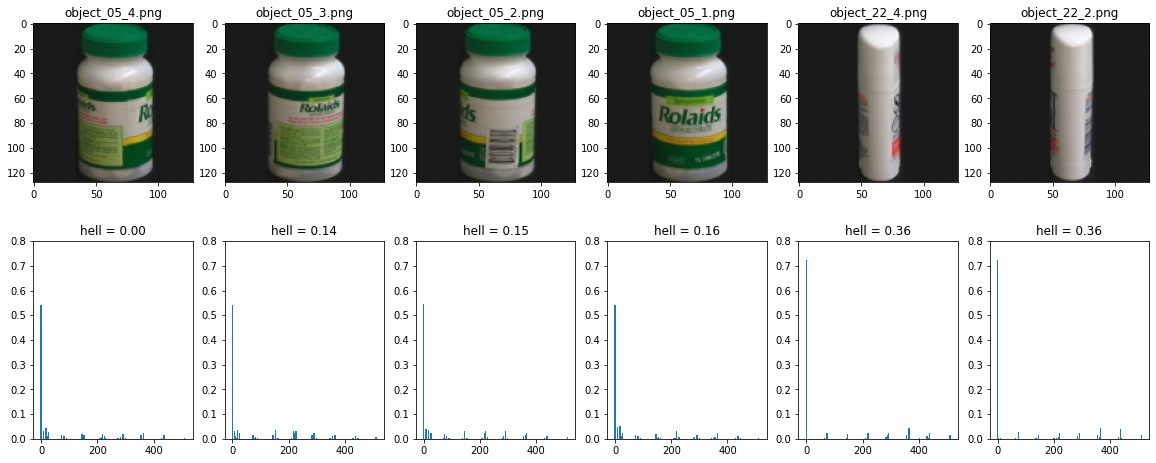

In [ ]:
for mode in ["L2", "X", "intersection", "hell"]:
  fig, axs = plt.subplots(2, 6, figsize=(20,8))

  for i, q in enumerate(qss[mode][:6]):
    axs[0, i].title.set_text(q.name)
    axs[0, i].imshow(q.image)
  
  y_max = 0.8
  for i, q in enumerate(qss[mode][:6]):
    axs[1, i].set_ylim(0,y_max)
    axs[1, i].title.set_text(f"{mode} = {compare_histograms(q.hist, H_, mode):.2f}")
    axs[1, i].bar(range(len(q.hist)), q.hist, width=5)

EX 1e

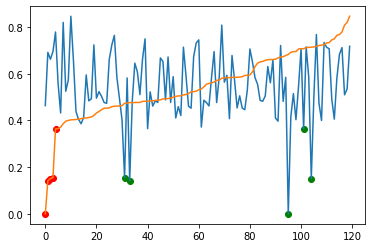

In [ ]:
mode = "hell"
y1 = np.array([compare_histograms(q.hist, H_, mode) for q in list(retrieved)])
plt.plot(y1)


y2 = np.array([compare_histograms(q.hist, H_, mode) for q in qss[mode]])
plt.plot(y2)

for i in range(0,5):
  plt.scatter(i,y2[i],color="red")
  plt.scatter(np.where(y1 == y2[i])[0],y2[i],color="green")


EX 2b

0.9999999974

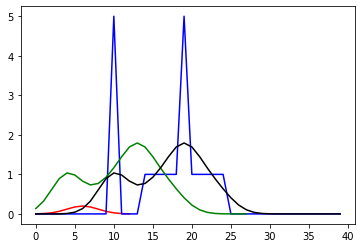

In [ ]:
def simple_convolution(I,k):
  if len(k) % 2 == 0:
    raise Exception("even len(kernel)")
  Inew = np.copy(I)
  N = int(len(k)/2)
  for i in range(N, len(I)-N):
    Inew[i] =  np.sum(I[i-N:i+N+1]*k)
  return Inew[N:len(I)-N]

kernel = read_data("/content/drive/MyDrive/ColabNotebooks/assignment2/kernel.txt")
signal = read_data("/content/drive/MyDrive/ColabNotebooks/assignment2/signal.txt")


plt.plot(np.arange(len(kernel)), kernel, color="red")
plt.plot(np.arange(len(signal)), signal, color="blue")

res = simple_convolution(signal, kernel)
plt.plot(np.arange(len(res)), res, color="green")

rescv2 = cv2.filter2D(src= signal, ddepth=-1 ,kernel = kernel)
plt.plot(np.arange(len(rescv2)), rescv2, color="black")

sum(kernel)


EX 2c*

In [1]:
def simple_convolution_mirror(I,k):
  N = int(len(k)/2)
  Inew = np.zeros(len(I)+2*N)
  Inew[:N] = np.flip(I[:N])
  Inew[-N:] = np.flip(I[-N:])
  Inew[N:-N] = np.copy(I)
  
  return simple_convolution(Inew, k)[N:-N]

kernel = read_data("/content/drive/MyDrive/ColabNotebooks/assignment2/kernel.txt")
signal = read_data("/content/drive/MyDrive/ColabNotebooks/assignment2/signal.txt")


# plot previous
res = simple_convolution(signal, kernel)
plt.plot(np.arange(len(res)), res, color="green")

# plot new
res2 = simple_convolution_mirror(signal, kernel)
plt.plot(np.arange(len(res2)), res2, color="yellow")

res == res2


NameError: ignored

EX 3d

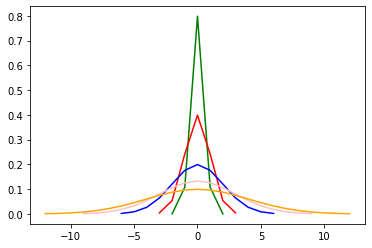

In [5]:
def gaussian(o=2):
  N = int(np.ceil(3*o))
  k = np.zeros(2*N+1)
  inter = np.arange(-N,N+1)
  return 1/(np.sqrt(2*np.pi)*o) * np.exp(-1*(np.square(inter)/(2*o*o)))

res = gaussian(0.5)
N = (len(res)-1)/2
plt.plot(np.arange(-N,N+1), res, color="green")

res = gaussian(1)
N = (len(res)-1)/2
plt.plot(np.arange(-N,N+1), res, color="red")

res = gaussian(2)
N = (len(res)-1)/2
plt.plot(np.arange(-N,N+1), res, color="blue")

res = gaussian(3)
N = (len(res)-1)/2
plt.plot(np.arange(-N,N+1), res, color="pink")

res = gaussian(4)
N = (len(res)-1)/2
plt.plot(np.arange(-N,N+1), res, color="orange")



EX 2e

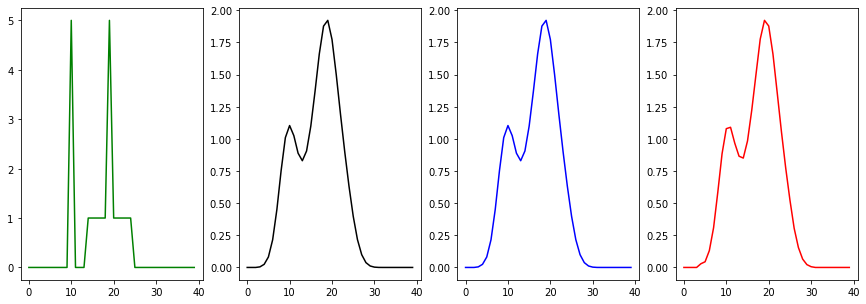

In [ ]:
signal = read_data("/content/drive/MyDrive/ColabNotebooks/assignment2/signal.txt")
k1 = gaussian(2)
k2 = np.array([0.1, 0.6, 0.4])


fig, axs = plt.subplots(1, 4, figsize=(15,5))

axs[0].plot(np.arange(len(signal)), signal, color="green")

signal_k1 = cv2.filter2D(src=signal, ddepth=-1, kernel = k1)
signal_k1_k2 = cv2.filter2D(src=signal_k1, ddepth=-1, kernel = k2)
axs[1].plot(np.arange(len(signal_k1_k2)), signal_k1_k2, color="black")

signal_k2 = cv2.filter2D(src=signal, ddepth=-1, kernel = k2)
signal_k2_k1 = cv2.filter2D(src=signal_k2, ddepth=-1, kernel = k1)
axs[2].plot(np.arange(len(signal_k1_k2)), signal_k2_k1, color="blue")

k1_k2 = cv2.filter2D(src=k1, ddepth=-1, kernel = k2)
k1_k2_signal = cv2.filter2D(src=signal, ddepth=-1, kernel = k1_k2)
axs[3].plot(np.arange(len(k1_k2_signal)), k1_k2_signal, color="red")

EX 3a

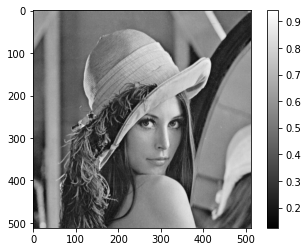

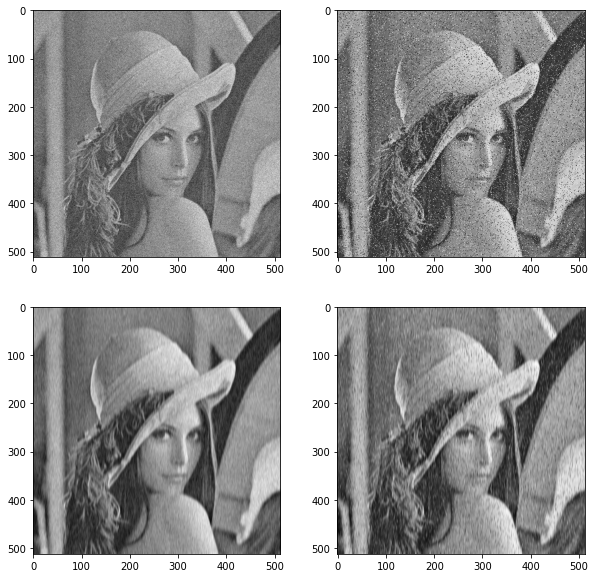

In [6]:
def gaussfilter(I, o=2):
  k = gaussian(o)
  I_k = cv2.filter2D(src=I, ddepth=-1, kernel = k)
  # mora bi 2d
  kT = k.reshape((len(k),1))
  I_k_kT = cv2.filter2D(src=I_k, ddepth=-1, kernel = kT)
  return I_k_kT

I = imread("/content/drive/MyDrive/ColabNotebooks/assignment2/images/lena.png")
I = gray(I)
imshow(I)
fig, axs = plt.subplots(2, 2, figsize=(10,10))
I1 = gauss_noise(np.copy(I))
I2 = sp_noise(np.copy(I))
axs[0,0].imshow(I1)
axs[0,1].imshow(I2)
axs[1,0].imshow(gaussfilter(I1))
axs[1,1].imshow(gaussfilter(I2))


EX 3b

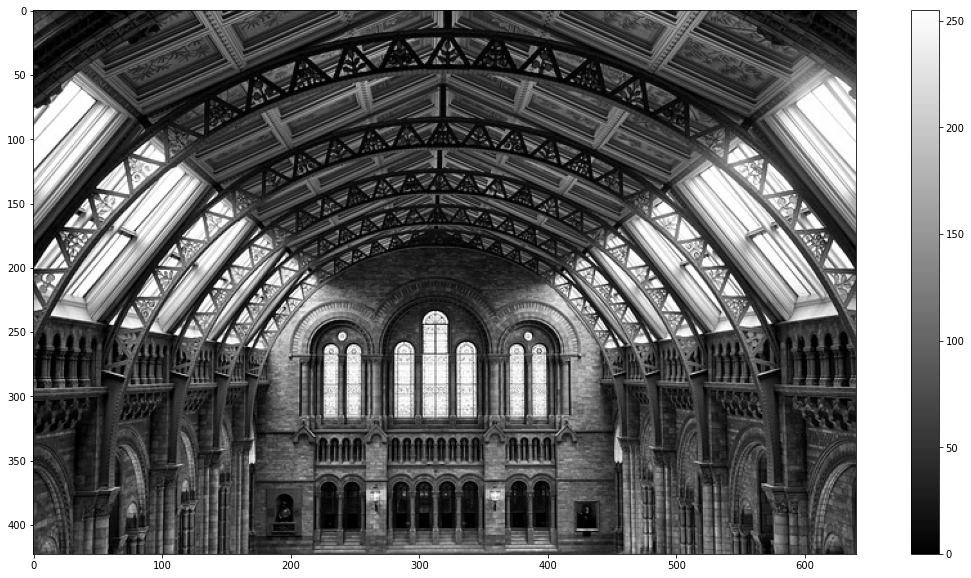

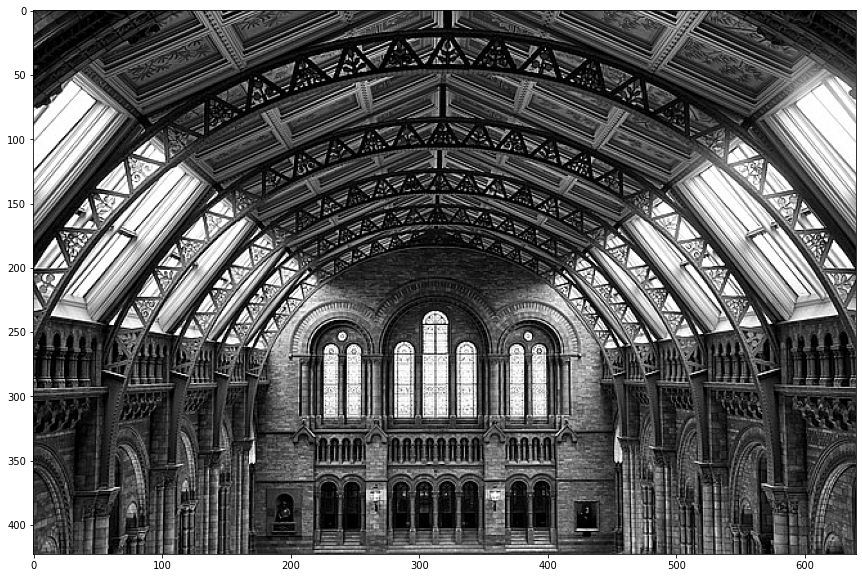

In [ ]:
def sharpen(I):
  k1 = np.array([[0,0,0],[0,2,0],[0,0,0]])
  k2 = np.ones((3,3))
  k = k1-1/9*k2
  #imshow(k)
  I_k = cv2.filter2D(src=I, ddepth=-1, kernel = k)
  I_k = I_k + np.abs(np.amin(I_k))
  I_k = I_k/np.amax(I_k)
  return I_k


I = cv2.imread("/content/drive/MyDrive/ColabNotebooks/assignment2/images/museum.jpg")
I = gray(I)
plt.subplots(figsize=(20,10))
imshow(I)
plt.subplots(figsize=(20,10))
plt.imshow(sharpen(I))


EX 3c

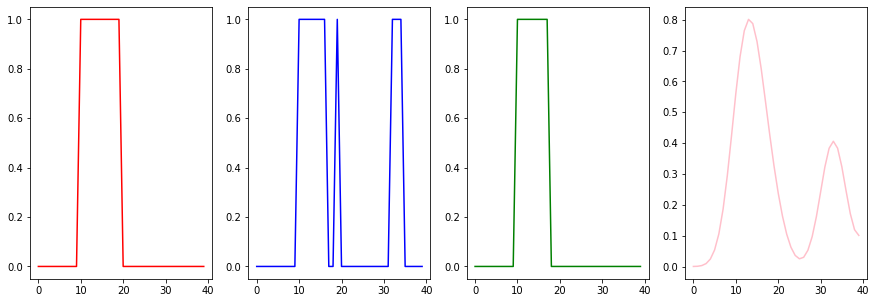

In [ ]:
def simple_median(I,w):
  Inew = np.copy(I)
  N = int((w-1)/2)
  for i in range(len(I)):
    if i < N:
      Inew[i] = np.median(I[:i+N+1])
    elif i >= len(I) - N:
      Inew[i] = np.median(I[i-N:])
    else:
      Inew[i] = np.median(I[i-N:i+N+1])
  return Inew

fig, axes = plt.subplots(1, 4, figsize=(15,5))

signal = np.zeros(40)
signal[10:20] = np.ones(10)
axes[0].plot(np.arange(len(signal)), signal, color="red")
signal = sp_noise_1D(signal)
axes[1].plot(np.arange(len(signal)), signal, color="blue")
signal_median = simple_median(signal,10)
axes[2].plot(np.arange(len(signal_median)), signal_median, color="green")
signal_gauss = gaussfilter(signal)
axes[3].plot(np.arange(len(signal_gauss)), signal_gauss, color="pink")




EX 3e*

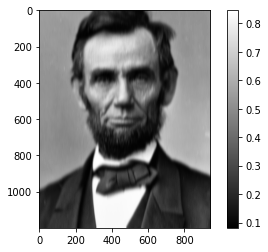

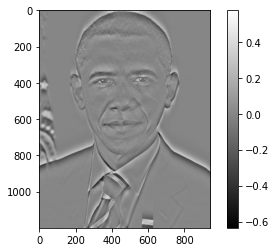

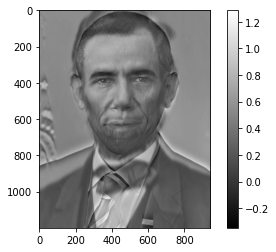

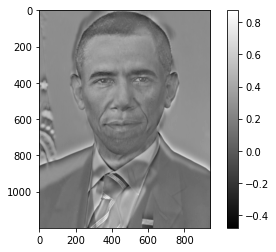

In [ ]:
def laplacian(o=30):
  g = gaussian(o)
  unit = np.zeros(g.shape)
  N = int(len(unit)/2)
  unit[N] = 1.
  return unit - g

I1 = imread("/content/drive/MyDrive/ColabNotebooks/assignment2/images/lincoln.jpg")
I1 = gray(I1)
I1 = gaussfilter(I1,o=6)
imshow(I1)


I2 = imread("/content/drive/MyDrive/ColabNotebooks/assignment2/images/obama.jpg")
I2 = gray(I2)
l = laplacian()
I2 = cv2.filter2D(src=I2, ddepth=-1, kernel = l)
I2 = cv2.filter2D(src=I2, ddepth=-1, kernel = l.T)
imshow(I2)

I3 = I1 + I2
imshow(I3)

I3 = 0.5 * I1 +  I2
imshow(I3)